In [1]:
import pickle
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.stem import porter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
true_df = pickle.load(open("pickle_files/true_df.pkl", "rb" ))
true_df_backup = pickle.load(open("pickle_files/true_df_backup.pkl", "rb" ))

In [3]:
true_df.source.value_counts()

Info wars          515
Reuters            495
Mother Jones       455
Activist Post      420
National Review    418
Huffington Post    412
Alabama Today      385
Daily Beast        347
Breitbart          307
Global Research    190
Fox News           121
Associate Press     27
Name: source, dtype: int64

In [4]:
stemmer = porter.PorterStemmer()
stopwords = stopwords.words()

In [5]:
def clean_text(text):
    '''Removes stop words and changes word to stem words'''
    cleaned_text = []
    for post in text:
        cleaned_words = []
        for word in post.split():
            low_word = stemmer.stem(word.lower())
            if low_word not in stopwords:
                cleaned_words.append(low_word)
        cleaned_text.append(' '.join(cleaned_words))
    return cleaned_text

In [6]:
cleaned_text = clean_text(true_df.body)

In [7]:
'''with open('cleaned_text.pkl', 'wb') as picklefile:
        pickle.dump(cleaned_text, picklefile)'''

In [13]:
'''clean_text = pickle.load(open("pickle_files/clean_text.pkl", "rb" ))'''


In [50]:
os.system('say "This job is as done as we are with Sarah Sander\'s stupid lies."')

0

In [7]:
len(cleaned_text)

4092

In [223]:
def drop_nouns(text_list):
    no_nouns = []
    cleaned_text = []
    all_nouns = ['NN' or 'NNS' or 'NNP' or 'NNPS']
    for x in text_list:
        words = pos_tag(word_tokenize(x))
        #werdz = [s for s in words if s[-1] != 'NN']# or 'NNS' or 'NNP' or 'NNPS']
        #werdz = [s for s in werdz if s[-1] != 'NNS']
        #werdz2 = ['NNPS', 'NNP', 'NN', 'NNS', 'JJ', 'JJS', 'JJR', 'VB', 'VB', 'VBD', 'VBG', 'VBN', 'VBN', 'VBP', 'VBZ']
        werdz2 = (['CC','CD','DT','EX','FW','IN','LS','MD','PDT','POS','PRP','PRP$',
                   'RP','TO','UH','WDT','WP','WP$','WRB', 'NNP', 'NNPS', ',', '.', ':', '(', ')'])
        werdz = [s for s in words if s[-1] not in werdz2]
        #werdz2 = [s for s, pos in words if pos != 'NNP']
        '''werdz = [s for s in werdz if s[-1] != ',']
        werdz = [s for s in werdz if s[-1] != '.']
        werdz = [s for s in werdz if s[-1] != ':']
        werdz = [s for s in werdz if s[-1] != 'CD']
        werdz = [s for s in werdz if s[-1] != '(']
        werdz = [s for s in werdz if s[-1] != ')']'''
        say_no = ['@','[', ']', 'amp', 'window', 'open','click', 'googletag', 'gpt', 'linkitem', 'googletag', 'getelementbyid',
        'config', 'ldadinit', 'advertis', 'typeof', 'adsdiv', 'fjs', 'js', 'http', 'com', 'awr', 'new', 'function', 'div',
        'ad', 'script', 'typeof', 'nr_is_logged_in', 'undefined', 'adsdiv', 'sharebox_260x60', 'ifr', 'jwplayer', 'jwp',
        'pubdate', 'adunit', 'adwidth', 'www', 'bit.ly/2jpexyr', 'googletag.cmd.push', 'googletag.display', '\'div-gpt-ad-1415299254516-0 \'']
        werdz = [s[-2] for s in werdz if s[-2] not in say_no]
        '''werdz = [s[-2] for s in werdz if s[-2] != '@']
        werdz = [s for s in werdz if s != '[']
        werdz = [s for s in werdz if s != ']']
        werdz = [s for s in werdz if s != 'amp']
        werdz = [s for s in werdz if s != 'window']
        werdz = [s for s in werdz if s != 'open']
        werdz = [s for s in werdz if s != 'click']
        werdz = [s for s in werdz if s != 'googletag']
        werdz = [s for s in werdz if s != 'gpt']
        werdz = [s for s in werdz if s != 'linkitem']
        werdz = [s for s in werdz if s != 'googletag']
        werdz = [s for s in werdz if s != 'getelementbyid']
        werdz = [s for s in werdz if s != 'config']
        werdz = [s for s in werdz if s != 'ldadinit']
        werdz = [s for s in werdz if s != 'advertis']
        werdz = [s for s in werdz if s != 'typeof']
        werdz = [s for s in werdz if s != 'adsdiv']
        werdz = [s for s in werdz if s != 'fjs']
        werdz = [s for s in werdz if s != 'js']
        werdz = [s for s in werdz if s != 'http']
        werdz = [s for s in werdz if s != 'com']
        werdz = [s for s in werdz if s != 'awr']
        werdz = [s for s in werdz if s != 'new']
        werdz = [s for s in werdz if s != 'function']
        werdz = [s for s in werdz if s != 'div']
        werdz = [s for s in werdz if s != 'ad']
        werdz = [s for s in werdz if s != 'script']
        werdz = [s for s in werdz if s != 'typeof']
        werdz = [s for s in werdz if s != 'nr_is_logged_in']
        werdz = [s for s in werdz if s != 'undefined']
        werdz = [s for s in werdz if s != 'adsdiv']
        werdz = [s for s in werdz if s != 'sharebox_260x60']
        werdz = [s for s in werdz if s != 'ifr']
        werdz = [s for s in werdz if s != 'jwplayer']
        werdz = [s for s in werdz if s != 'jwp']
        werdz = [s for s in werdz if s != 'pubdate']
        werdz = [s for s in werdz if s != 'adunit']
        werdz = [s for s in werdz if s != 'adwidth']
        werdz = [s for s in werdz if s != 'www']
        werdz = [s for s in werdz if s != 'origadsplid']
        werdz = [s for s in werdz if s != 'https']
        werdz = [s for s in werdz if s != 'adsbygoogl']
        #werdz = [s for s in werdz if s != 'bit.ly/2jbh4lu']'''
        #check cleaned text line from function above
        no_nouns.append(' '.join(werdz))
        #no_nouns.append(werdz)
    return no_nouns

In [ ]:
'''no_nouns.append(' '.join(werdz))
werdz = [s[-2] for s in werdz if s[-2] != '@']
        werdz = [s for s in werdz if s != '[']
        werdz = [s for s in werdz if s != ']']
        werdz = [s for s in werdz if s != 'amp']
        werdz = [s for s in werdz if s != 'window']
        werdz = [s for s in werdz if s != 'open']
        werdz = [s for s in werdz if s != 'click']
        werdz = [s for s in werdz if s != 'googletag']
        werdz = [s for s in werdz if s != 'gpt']
        werdz = [s for s in werdz if s != 'linkitem']
        werdz = [s for s in werdz if s != 'googletag']
        werdz = [s for s in werdz if s != 'getelementbyid']
        werdz = [s for s in werdz if s != 'config']
        werdz = [s for s in werdz if s != 'ldadinit']
        werdz = [s for s in werdz if s != 'advertis']
        werdz = [s for s in werdz if s != 'typeof']
        werdz = [s for s in werdz if s != 'adsdiv']
        werdz = [s for s in werdz if s != 'fjs']
        werdz = [s for s in werdz if s != 'js']
        werdz = [s for s in werdz if s != 'http']
        werdz = [s for s in werdz if s != 'com']
        werdz = [s for s in werdz if s != 'awr']
        werdz = [s for s in werdz if s != 'new']
        werdz = [s for s in werdz if s != 'function']
        werdz = [s for s in werdz if s != 'div']
        werdz = [s for s in werdz if s != 'ad']
        werdz = [s for s in werdz if s != 'script']
        werdz = [s for s in werdz if s != 'typeof']
        werdz = [s for s in werdz if s != 'nr_is_logged_in']
        werdz = [s for s in werdz if s != 'undefined']
        werdz = [s for s in werdz if s != 'adsdiv']
        werdz = [s for s in werdz if s != 'sharebox_260x60']
        werdz = [s for s in werdz if s != 'ifr']
        werdz = [s for s in werdz if s != 'jwplayer']
        werdz = [s for s in werdz if s != 'jwp']
        werdz = [s for s in werdz if s != 'pubdate']
        werdz = [s for s in werdz if s != 'adunit']
        werdz = [s for s in werdz if s != 'adwidth']
        werdz = [s for s in werdz if s != 'www']
        werdz = [s for s in werdz if s != 'origadsplid']
        werdz = [s for s in werdz if s != 'https']
        werdz = [s for s in werdz if s != 'adsbygoogl']
        werdz = [s for s in werdz if s != 'bit.ly/2jbh4lu']
'''

In [224]:
len(cleaned_text)

4092

In [220]:
what_the = drop_nouns(cleaned_text)

In [222]:
what_the

['follow statement post verifi twitter account u.s. presid donald trump realdonaldtrump potus u.s. presid donald trump hold make america great ralli nashvil municip auditorium nashville tennessee u.s. reuters/leah millisth opinion express hi own reuter edit statement confirm accuracy realdonaldtrump mitch mcconnel announc cancel senate august recess great mayb democrat final get someth done accept high crime high taxes need border security edt great night republicans congratul john cox realli big number california win even fake news cnn said trump impact wa realli big much bigger ever thought possible much big blue wave big red wave work hard edt gold star father ceejay metcalf great michael wa honor white house fantast morn foxandfriends special man edt fake news media unfair vicious wife great first lady melania dure recoveri surgeri report everyth death facelift left w.h virginia abuse fake realli well edt sourc link bit.ly/2jbh4lu compil bureauour standards th thomson reuter trust 

In [221]:
with open('what_the.pkl', 'wb') as picklefile:
        pickle.dump(what_the, picklefile)

In [4]:
'''text_w_no_nouns = pickle.load(open("pickle_files/text_w_no_nouns.pkl", "rb" ))'''

In [122]:

corpus = []
for linklist in no_nouns_part1:
    print(linklist)
    for link in linklist:
        corpus.append(link)

follow statement post verifi twitter account u.s. presid donald trump realdonaldtrump potus u.s. presid donald trump hold make america great ralli nashvil municip auditorium nashville tennessee u.s. may reuters/leah millisth opinion express hi own reuter edit statement confirm accuracy realdonaldtrump mitch mcconnel announc cancel senate ’ august recess great mayb democrat final get someth done accept high crime high taxes need border security edt great night republicans congratul john cox realli big number california win even fake news cnn said trump impact wa realli big much bigger ever thought possible much big blue wave may big red wave work hard edt gold star father ceejay metcalf whose great michael wa honor white house wa fantast morn foxandfriends special man edt fake news media unfair vicious wife great first lady melania dure recoveri surgeri report everyth near death facelift left w.h and me n.y. virginia abuse fake realli well edt sourc link bit.ly/2jbh4lu bit.ly/2jpexyr co

In [138]:
corpus

['f',
 'o',
 'l',
 'l',
 'o',
 'w',
 ' ',
 's',
 't',
 'a',
 't',
 'e',
 'm',
 'e',
 'n',
 't',
 ' ',
 'p',
 'o',
 's',
 't',
 ' ',
 'v',
 'e',
 'r',
 'i',
 'f',
 'i',
 ' ',
 't',
 'w',
 'i',
 't',
 't',
 'e',
 'r',
 ' ',
 'a',
 'c',
 'c',
 'o',
 'u',
 'n',
 't',
 ' ',
 'u',
 '.',
 's',
 '.',
 ' ',
 'p',
 'r',
 'e',
 's',
 'i',
 'd',
 ' ',
 'd',
 'o',
 'n',
 'a',
 'l',
 'd',
 ' ',
 't',
 'r',
 'u',
 'm',
 'p',
 ' ',
 'r',
 'e',
 'a',
 'l',
 'd',
 'o',
 'n',
 'a',
 'l',
 'd',
 't',
 'r',
 'u',
 'm',
 'p',
 ' ',
 'p',
 'o',
 't',
 'u',
 's',
 ' ',
 'u',
 '.',
 's',
 '.',
 ' ',
 'p',
 'r',
 'e',
 's',
 'i',
 'd',
 ' ',
 'd',
 'o',
 'n',
 'a',
 'l',
 'd',
 ' ',
 't',
 'r',
 'u',
 'm',
 'p',
 ' ',
 'h',
 'o',
 'l',
 'd',
 ' ',
 'm',
 'a',
 'k',
 'e',
 ' ',
 'a',
 'm',
 'e',
 'r',
 'i',
 'c',
 'a',
 ' ',
 'g',
 'r',
 'e',
 'a',
 't',
 ' ',
 'r',
 'a',
 'l',
 'l',
 'i',
 ' ',
 'n',
 'a',
 's',
 'h',
 'v',
 'i',
 'l',
 ' ',
 'm',
 'u',
 'n',
 'i',
 'c',
 'i',
 'p',
 ' ',
 'a',
 'u',
 'd',
 'i'

In [153]:
os.system('say "Your move.....Commander"')

0

Without join: 134 µs ± 2.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

With join: 289 µs ± 22.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

In [19]:
#This will break the computer
'''short_text = []
clear = []
for text in no_nouns_part1[:5]:
    #print(text)
    for part in text:
        clear.append(part)
        print(clear)
    short_text.append(' '.join(text))'''

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['The', 'following', 'statements', 'were', 'posted', 'to', 'the', 'verified', 'Twitter', 'accounts', 'of', 'U.S.', 'President', 'Donald', 'Trump', ',', '@', 'realDonaldTrump', 'and', '@', 'POTUS', '.', 'U.S.', 'President', 'Donald', 'Trump', 'holds', 'a', 'Make', 'America', 'Great', 'Again', 'rally', 'at', 'Nashville', 'Municipal', 'Auditorium', 'in', 'Nashville', ',', 'Tennessee', ',', 'U.S.', ',', 'May', '29', ',', '2018', '.', 'REUTERS/Leah', 'MillisThe', 'opinions', 'expressed', 'are', 'his', 'own', '.', 'Reuters', 'has', 'not', 'edited', 'the', 'statements', 'or', 'confirmed', 'their', 'accuracy', '.', '@', 'realDonaldTrump', ':', '-', 'Mitch', 'McConnell', 'announced', 'he', 'will', 'cancel', 'the', 'Senate', '’', 's', 'August', 'Recess', '.', 'Great', ',', 'maybe', 'the', 'Democrats', 'will', 'finally', 'get', 'something', 'done', 'other', 'than', 'their', 'acceptance', 'of', 'High', 'Crime', 'and', 'High', 'Taxes', '.', 'We', 'need', 'Border', 'Security', '!', '[', '0002', 'ED

In [ ]:
os.system('say "your move Commander"')

In [51]:
with open('corpus.pkl', 'wb') as picklefile:
        pickle.dump(corpus, picklefile)

In [3]:
'''cleaned_text = pickle.load(open("pickle_files/clean_text.pkl", "rb" ))'''

In [4]:
corpus = pickle.load(open("pickle_files/corpus.pkl", "rb" ))

In [5]:
count_vectorizer2 = CountVectorizer(ngram_range=(1, 4),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)

X = count_vectorizer2.fit_transform(corpus)

In [ ]:
n_topics = 50
n_iter = 10
lda = LatentDirichletAllocation(n_topics=n_topics,
                                max_iter=n_iter,
                                random_state=42,
                               learning_method='online')
X_centered_projected = lda.fit_transform(X)

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [ ]:
def display_topics(model, feature_names, no_top_words):
    '''Creates a list of words in each topics'''
    for ix, topic in enumerate(model.components_):
        print("Topic ", ix+1)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
display_topics(lda,count_vectorizer2.get_feature_names(),20)

In [119]:
SSEs = []
Sil_coefs = []
for k in range(2,21):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_centered_projected)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(X_centered_projected, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

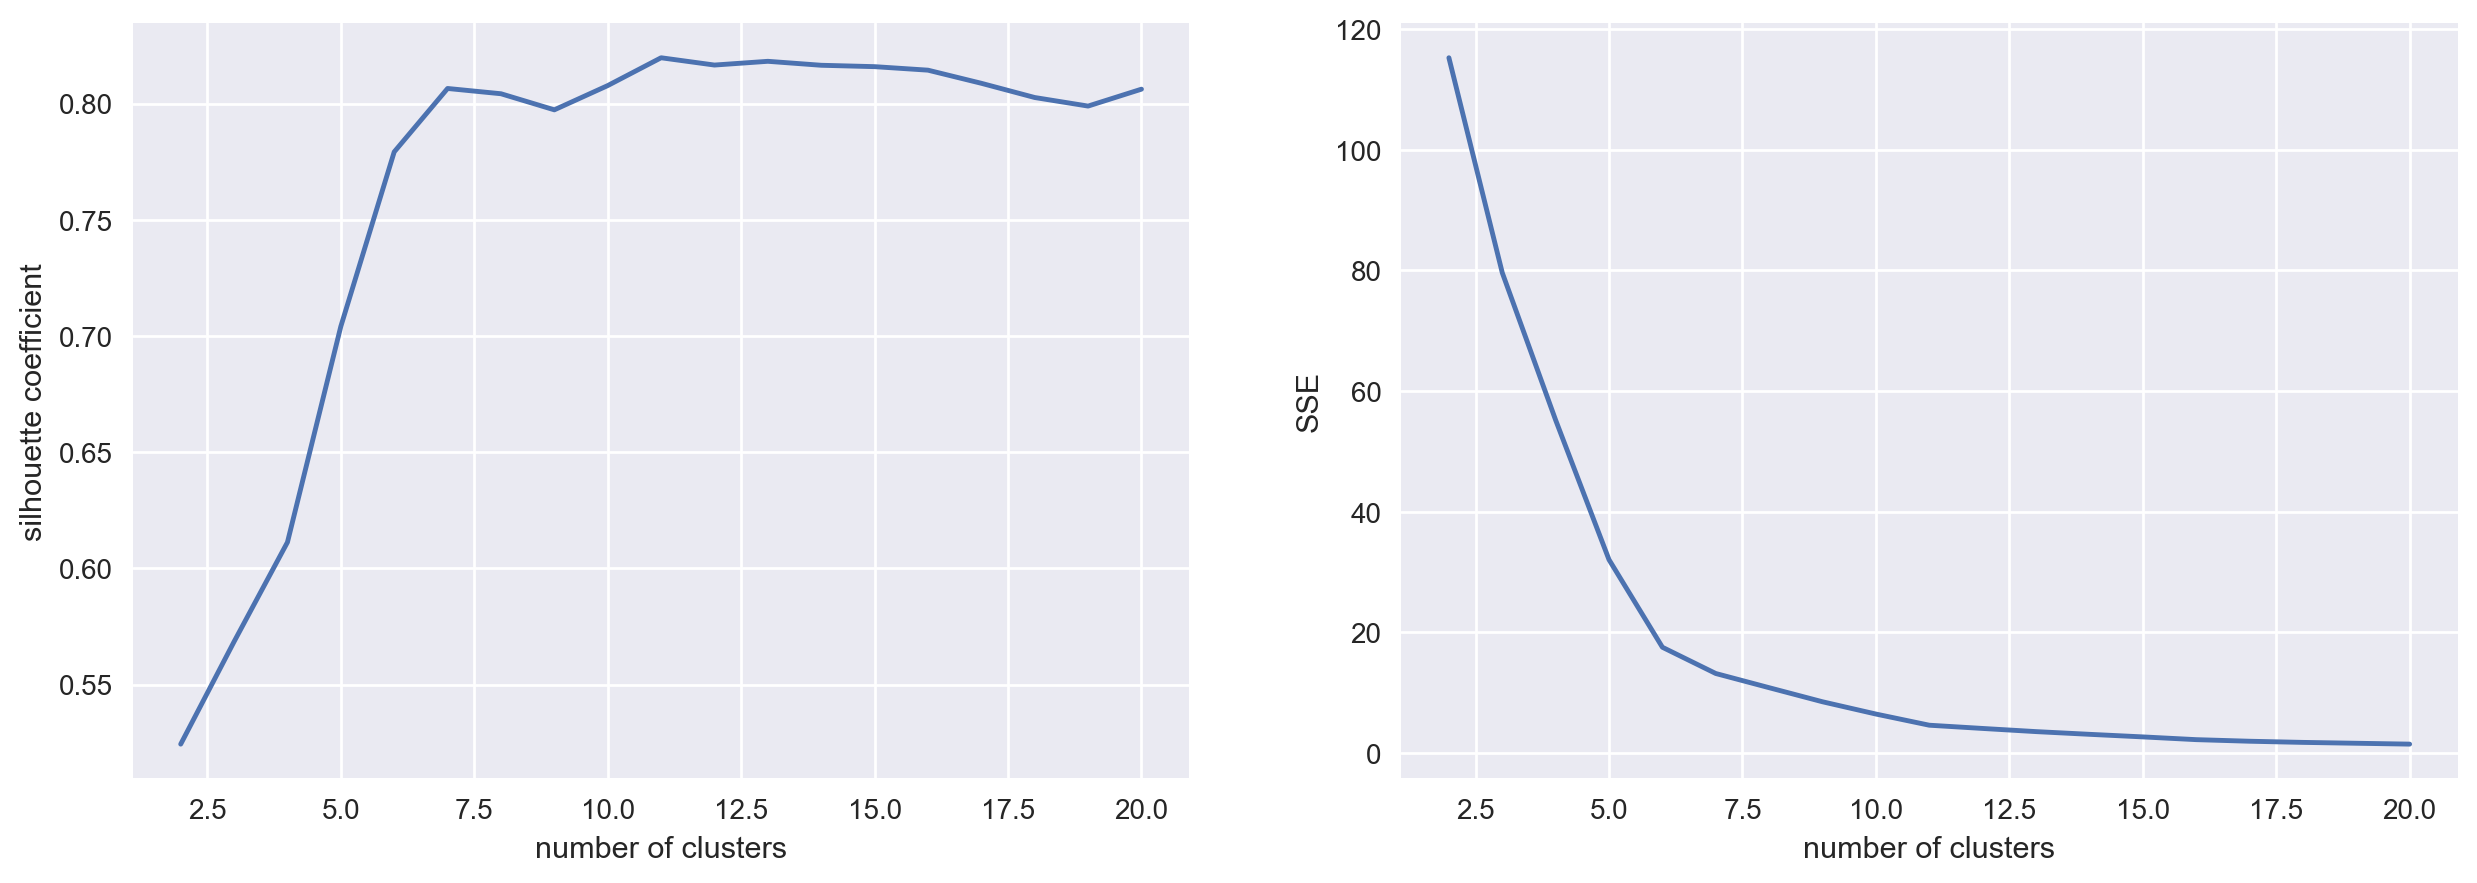

In [120]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,21)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [68]:
km = KMeans(n_clusters=20)
clusts = km.fit_predict(X_centered_projected)

In [71]:
centers = km.cluster_centers_
centers

array([[9.45032045e-07, 9.45032062e-07, 2.62917196e-01, 9.45032046e-07,
        1.59432678e-04, 9.45032045e-07, 9.45032045e-07, 9.45032045e-07,
        3.44113765e-03, 9.45032045e-07, 9.45032045e-07, 9.45032045e-07,
        9.45032045e-07, 9.45032045e-07, 9.45032045e-07, 9.45032045e-07,
        9.45032045e-07, 9.45032063e-07, 4.20935104e-03, 7.29258707e-01],
       [5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02],
       [1.26875080e-05, 1.26875081e-05, 1.26875081e-05, 1.26875080e-05,
        1.26875081e-05, 1.26875080e-05, 1.26875080e-05, 1.26875080e-05,
        9.98790780e-01, 1.26875080e-05, 1.26875080e-05, 1.26875080e-05,
        1.26875080e-05, 1.26875080e-05, 1.26875080e-05, 1.2687

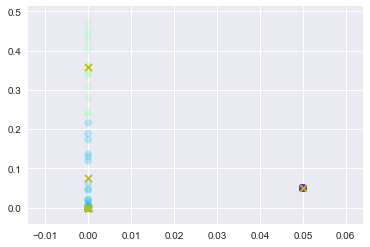

In [72]:
plt.scatter(X_centered_projected[:, 0], X_centered_projected[:, 1], c=clusts, cmap=plt.cm.rainbow, alpha=0.25)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='y')
#plt.xlim(-.5,1.5)
#plt.ylim(1.5,4.5)

In [121]:
os.system('say "your move Commander"')

0